Prostate Cancer Prediction
==========================



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('prostate_cancer_prediction.csv')
dataset.sample(5)

,Patient_ID,Age,Family_History,Race_African_Ancestry,PSA_Level,DRE_Result,Biopsy_Result,Difficulty_Urinating,Weak_Urine_Flow,Blood_in_Urine,...,Alcohol_Consumption,Hypertension,Diabetes,Cholesterol_Level,Screening_Age,Follow_Up_Required,Prostate_Volume,Genetic_Risk_Factors,Previous_Cancer_History,Early_Detection
25126,25127,84,No,No,3.71,Normal,Malignant,No,No,Yes,...,Low,Yes,No,Normal,49,Yes,77.5,Yes,Yes,Yes
24261,24262,58,Yes,Yes,4.98,Normal,Malignant,No,No,Yes,...,Moderate,Yes,No,Normal,43,No,65.3,No,No,Yes
604,605,52,No,No,13.23,Normal,Benign,No,Yes,No,...,Moderate,No,Yes,Normal,62,Yes,35.7,No,No,Yes
1577,1578,63,No,No,5.83,Normal,Benign,No,No,No,...,Moderate,No,No,High,50,Yes,72.3,Yes,No,Yes
9683,9684,77,No,No,14.76,Abnormal,Benign,Yes,No,No,...,Low,No,No,Normal,63,Yes,72.4,No,No,Yes


Describe the data

In [3]:
dataset.describe()

,Patient_ID,Age,PSA_Level,BMI,Screening_Age,Prostate_Volume
count,27945.000000,27945.000000,27945.000000,27945.000000,27945.000000,27945.000000
mean,13973.000000,64.459939,7.751599,26.511605,56.902308,47.755770
std,8067.170973,14.404755,4.175012,4.888293,10.118064,18.704286
min,1.000000,40.000000,0.500000,18.000000,40.000000,15.000000
25%,6987.000000,52.000000,4.130000,22.300000,48.000000,31.700000
50%,13973.000000,64.000000,7.750000,26.500000,57.000000,47.700000
75%,20959.000000,77.000000,11.320000,30.700000,66.000000,63.900000
max,27945.000000,89.000000,15.000000,35.000000,74.000000,80.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27945 entries, 0 to 27944
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               27945 non-null  int64  
 1   Age                      27945 non-null  int64  
 2   Family_History           27945 non-null  object 
 3   Race_African_Ancestry    27945 non-null  object 
 4   PSA_Level                27945 non-null  float64
 5   DRE_Result               27945 non-null  object 
 6   Biopsy_Result            27945 non-null  object 
 7   Difficulty_Urinating     27945 non-null  object 
 8   Weak_Urine_Flow          27945 non-null  object 
 9   Blood_in_Urine           27945 non-null  object 
 10  Pelvic_Pain              27945 non-null  object 
 11  Back_Pain                27945 non-null  object 
 12  Erectile_Dysfunction     27945 non-null  object 
 13  Cancer_Stage             27945 non-null  object 
 14  Treatment_Recommended 

Check null and duplicate

In [5]:
# Check for null values in the dataset
null_values = dataset.isnull().sum()
print(null_values)

Patient_ID                 0
Age                        0
Family_History             0
Race_African_Ancestry      0
PSA_Level                  0
DRE_Result                 0
Biopsy_Result              0
Difficulty_Urinating       0
Weak_Urine_Flow            0
Blood_in_Urine             0
Pelvic_Pain                0
Back_Pain                  0
Erectile_Dysfunction       0
Cancer_Stage               0
Treatment_Recommended      0
Survival_5_Years           0
Exercise_Regularly         0
Healthy_Diet               0
BMI                        0
Smoking_History            0
Alcohol_Consumption        0
Hypertension               0
Diabetes                   0
Cholesterol_Level          0
Screening_Age              0
Follow_Up_Required         0
Prostate_Volume            0
Genetic_Risk_Factors       0
Previous_Cancer_History    0
Early_Detection            0
dtype: int64


In [6]:
# Check for duplicated rows in the dataset
duplicated_data = dataset.duplicated().sum()
print(f"Number of duplicated rows: {duplicated_data}")

Number of duplicated rows: 0


Checking Data Unique

In [7]:
# Select categorical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Check for unique values in each categorical column
unique_values = {col: dataset[col].unique() for col in categorical_columns}

# Print unique values for each categorical column
for col, values in unique_values.items():
    print(f"Unique values in column '{col}': {values}")

Unique values in column 'Family_History': ['No' 'Yes']
Unique values in column 'Race_African_Ancestry': ['Yes' 'No']
Unique values in column 'DRE_Result': ['Normal' 'Abnormal']
Unique values in column 'Biopsy_Result': ['Benign' 'Malignant']
Unique values in column 'Difficulty_Urinating': ['No' 'Yes']
Unique values in column 'Weak_Urine_Flow': ['No' 'Yes']
Unique values in column 'Blood_in_Urine': ['No' 'Yes']
Unique values in column 'Pelvic_Pain': ['No' 'Yes']
Unique values in column 'Back_Pain': ['No' 'Yes']
Unique values in column 'Erectile_Dysfunction': ['No' 'Yes']
Unique values in column 'Cancer_Stage': ['Localized' 'Metastatic' 'Advanced']
Unique values in column 'Treatment_Recommended': ['Active Surveillance' 'Radiation' 'Immunotherapy' 'Chemotherapy'
 'Surgery' 'Hormone Therapy']
Unique values in column 'Survival_5_Years': ['Yes' 'No']
Unique values in column 'Exercise_Regularly': ['No' 'Yes']
Unique values in column 'Healthy_Diet': ['Yes' 'No']
Unique values in column 'Smoking

In [8]:
dataset = dataset.drop('Patient_ID', axis=1)

In [9]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

# OrdinalEncoder for specific columns
ordinal_columns = ['Alcohol_Consumption', 'Cholesterol_Level']
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Moderate', 'High'], ['Normal', 'High']])
ordinal_encoded = ordinal_encoder.fit_transform(dataset[ordinal_columns])

binary_columns = [col for col in categorical_columns if dataset[col].nunique() == 2]
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
binary_encoded = onehot_encoder.fit_transform(dataset[binary_columns])

# LabelEncoder for specific columns
label_columns = ['Cancer_Stage', 'Treatment_Recommended']
label_encoders = {col: LabelEncoder() for col in label_columns}
label_encoded = np.column_stack([label_encoders[col].fit_transform(dataset[col]) for col in label_columns])

# Combine all encoded features
encoded_features = np.column_stack([binary_encoded, ordinal_encoded, label_encoded])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(binary_columns).tolist() + ordinal_columns + label_columns)

# Drop original categorical columns and concatenate encoded features
dataset_encoded = pd.concat([dataset.drop(columns=categorical_columns), encoded_df], axis=1)


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
dataset_encoded.head()

,Age,PSA_Level,BMI,Screening_Age,Prostate_Volume,Family_History_Yes,Race_African_Ancestry_Yes,DRE_Result_Normal,Biopsy_Result_Malignant,Difficulty_Urinating_Yes,...,Diabetes_Yes,Cholesterol_Level_Normal,Follow_Up_Required_Yes,Genetic_Risk_Factors_Yes,Previous_Cancer_History_Yes,Early_Detection_Yes,Alcohol_Consumption,Cholesterol_Level,Cancer_Stage,Treatment_Recommended
0,78,5.07,22.3,45,46.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,68,10.24,20.4,65,78.2,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,54,13.79,20.5,61,21.1,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,4.0
3,82,8.03,28.4,47,79.9,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0
4,47,1.89,30.1,72,32.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


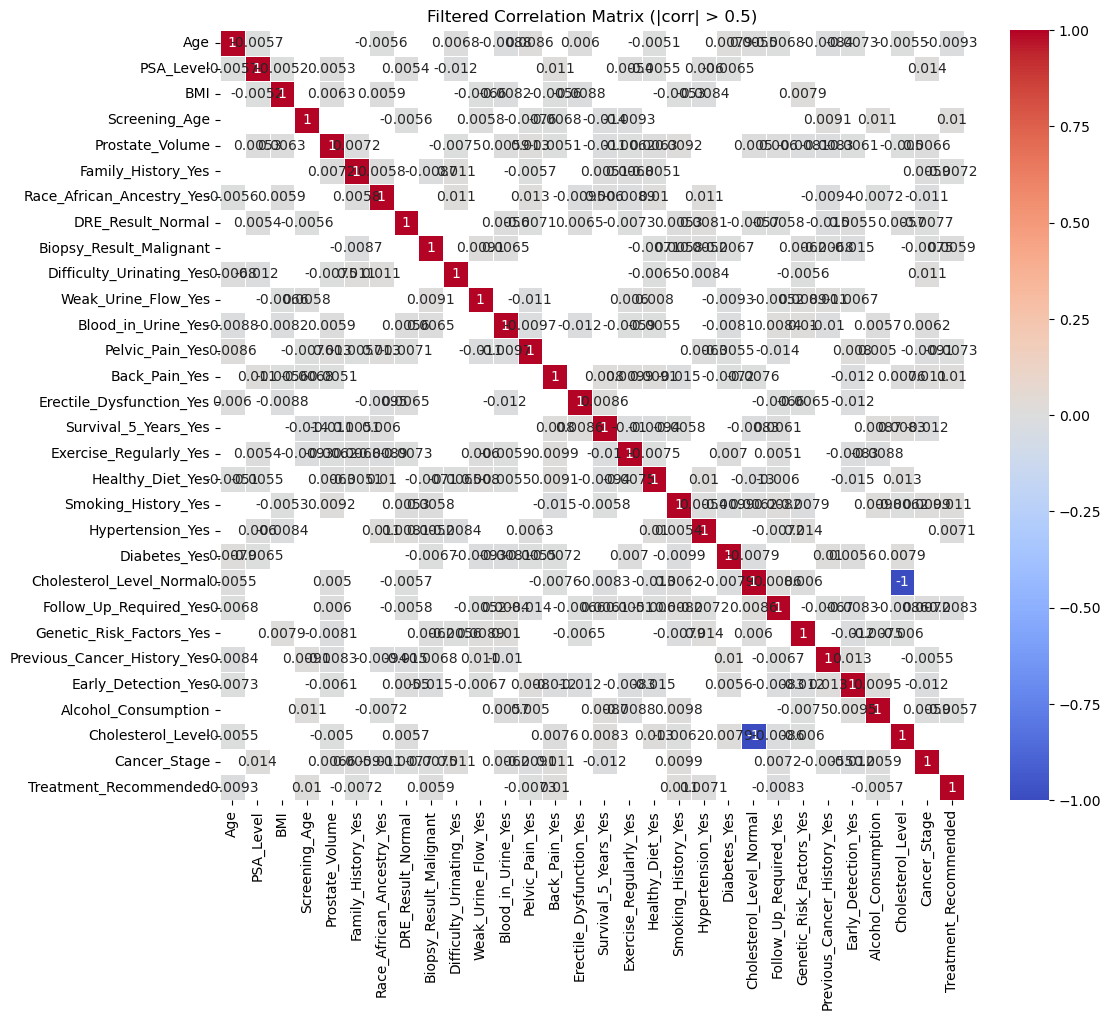

In [11]:
# Compute the correlation matrix
correlation_matrix = dataset_encoded.corr()

filtered_corr = correlation_matrix[(correlation_matrix > 0.005) | (correlation_matrix < -0.005)]

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Filtered Correlation Matrix (|corr| > 0.5)')
plt.show()

In [12]:
X = dataset_encoded.drop(columns=['Early_Detection_Yes'])
y = dataset_encoded['Early_Detection_Yes']

In [28]:
def runthemodel(X_train, y_train, X_test, y_test):
    # Initialize the models
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
    dt_model = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=42)
    lr_model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100, random_state=42)

    # Train the models
    rf_model.fit(X_train, y_train)
    dt_model.fit(X_train, y_train)
    lr_model.fit(X_train, y_train)

    # Make predictions
    rf_pred = rf_model.predict(X_test)
    dt_pred = dt_model.predict(X_test)
    lr_pred = lr_model.predict(X_test)

    # Evaluate the models
    rf_accuracy = accuracy_score(y_test, rf_pred)
    dt_accuracy = accuracy_score(y_test, dt_pred)
    lr_accuracy = accuracy_score(y_test, lr_pred)

    print(rf_accuracy, dt_accuracy, lr_accuracy)
    
    print("Classifcation Report for Random Forest:")    
    print(classification_report(y_test, rf_pred))
    
    print("Classifcation Report for Decision Tree:")
    print(classification_report(y_test, dt_pred))
    
    print("Classifcation Report for Logistic Regression:")
    print(classification_report(y_test, lr_pred))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

runthemodel(X_train, y_train, X_test, y_test)

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8494751908396947 0.7228053435114504 0.8494751908396947
Classifcation Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1262
         1.0       0.85      1.00      0.92      7122

    accuracy                           0.85      8384
   macro avg       0.42      0.50      0.46      8384
weighted avg       0.72      0.85      0.78      8384

Classifcation Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.15      0.18      0.16      1262
         1.0       0.85      0.82      0.83      7122

    accuracy                           0.72      8384
   macro avg       0.50      0.50      0.50      8384
weighted avg       0.74      0.72      0.73      8384

Classifcation Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1262
         1.0       0.85      1.00      0.92      7122


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\

Using Random Forest to determine the feature importances

In [ ]:
model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importance)

PSA_Level                      0.129834
Prostate_Volume                0.125061
BMI                            0.118805
Age                            0.103735
Screening_Age                  0.097255
Treatment_Recommended          0.053260
Alcohol_Consumption            0.028320
Cancer_Stage                   0.025223
Hypertension_Yes               0.019506
Follow_Up_Required_Yes         0.018507
Family_History_Yes             0.018205
Exercise_Regularly_Yes         0.018196
Smoking_History_Yes            0.018033
Weak_Urine_Flow_Yes            0.017699
Erectile_Dysfunction_Yes       0.017621
Difficulty_Urinating_Yes       0.017196
Race_African_Ancestry_Yes      0.015487
Biopsy_Result_Malignant        0.015469
Diabetes_Yes                   0.015198
Pelvic_Pain_Yes                0.014863
Healthy_Diet_Yes               0.014757
Genetic_Risk_Factors_Yes       0.014029
DRE_Result_Normal              0.013375
Cholesterol_Level_Normal       0.012938
Back_Pain_Yes                  0.012909


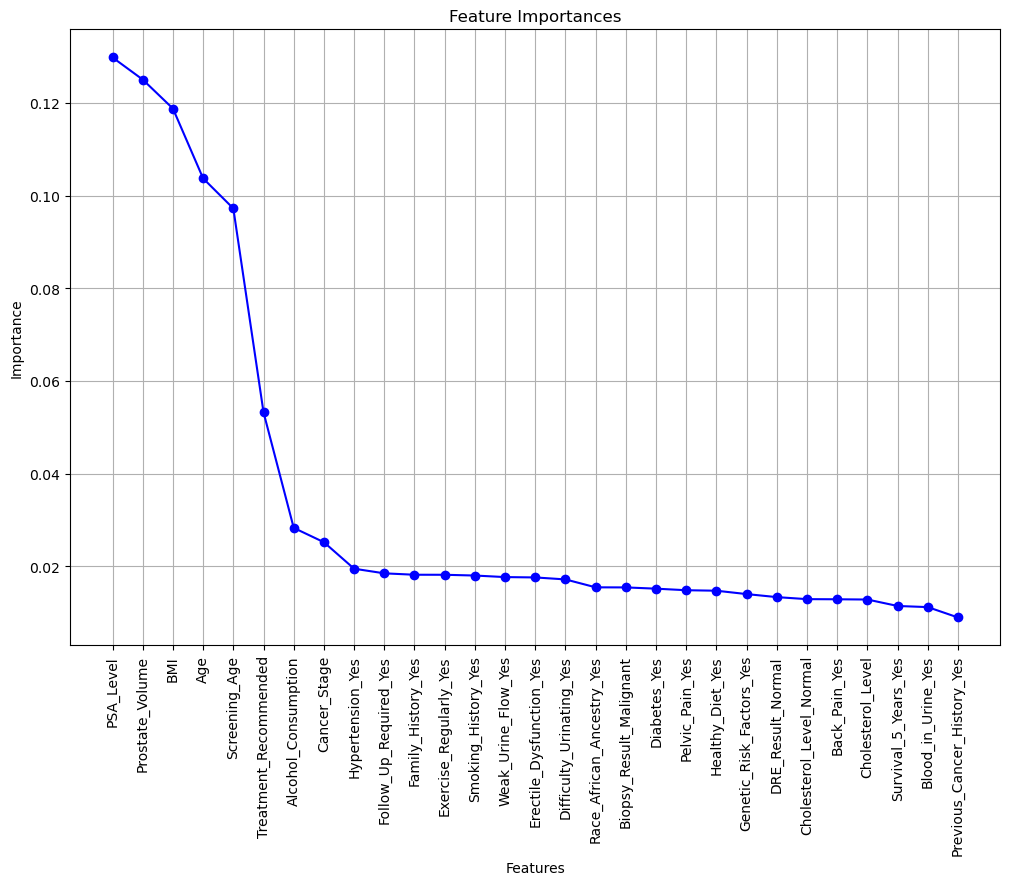

In [ ]:

plt.figure(figsize=(12, 8))
plt.plot(feature_importance.index, feature_importance.values, marker='o', linestyle='-', color='b')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.grid(True)
plt.show()


In [19]:
# Select the top 8 features based on their importance
top_8_features = feature_importance.index[:8]

# Create the feature matrix X and target vector y
X_top_8 = dataset_encoded[top_8_features]
y = dataset_encoded['Early_Detection_Yes']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_top_8, y, test_size=0.3, random_state=42)

runthemodel(X_train, y_train, X_test, y_test)

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8494751908396947 0.726145038167939 0.8494751908396947


In [ ]:
# from sklearn.feature_selection import chi2, SelectKBest
# from sklearn.model_selection import cross_val_score

# best_k = 10
# best_score = 0

# for k in range(10, 21):
#     X_new = SelectKBest(chi2, k=k).fit_transform(X, y)
#     scores = cross_val_score(RandomForestClassifier(random_state=42), X_new, y, cv=5)
#     mean_score = scores.mean()
#     print(f"k={k}, mean cross-validation score: {mean_score}")
#     if mean_score > best_score:
#         best_score = mean_score
#         best_k = k

# print(f"Best k: {best_k} with a score of {best_score}")

k=10, mean cross-validation score: 0.8237967436035069
k=11, mean cross-validation score: 0.831740919663625


KeyboardInterrupt: 

In [24]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y)
feature_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(feature_scores)
X_mutual = X.loc[:, feature_scores > 0.000000]
print(X_mutual.head())

Family_History_Yes             0.005258
Hypertension_Yes               0.004764
Exercise_Regularly_Yes         0.004062
DRE_Result_Normal              0.004049
Alcohol_Consumption            0.003984
Back_Pain_Yes                  0.003711
Difficulty_Urinating_Yes       0.003653
Smoking_History_Yes            0.003327
Prostate_Volume                0.002867
Cholesterol_Level              0.002797
Survival_5_Years_Yes           0.002209
Erectile_Dysfunction_Yes       0.002102
Healthy_Diet_Yes               0.002011
Age                            0.001988
Cholesterol_Level_Normal       0.001305
Pelvic_Pain_Yes                0.001283
Previous_Cancer_History_Yes    0.001092
Weak_Urine_Flow_Yes            0.000410
Biopsy_Result_Malignant        0.000179
PSA_Level                      0.000000
Blood_in_Urine_Yes             0.000000
Race_African_Ancestry_Yes      0.000000
Diabetes_Yes                   0.000000
Follow_Up_Required_Yes         0.000000
Genetic_Risk_Factors_Yes       0.000000


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_mutual, y, test_size=0.3, random_state=42)

runthemodel(X_train, y_train, X_test, y_test)

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8458969465648855 0.7313931297709924 0.8494751908396947


In [26]:
from sklearn.feature_selection import chi2, SelectKBest

X_new = SelectKBest(chi2, k=19).fit_transform(X, y)  #

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

runthemodel(X_train, y_train, X_test, y_test)

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8493559160305344 0.7226860687022901 0.8494751908396947


Checking Imbalanced Data (Got Dropped)

Yes    23747
No      4198
Name: Early_Detection, dtype: int64


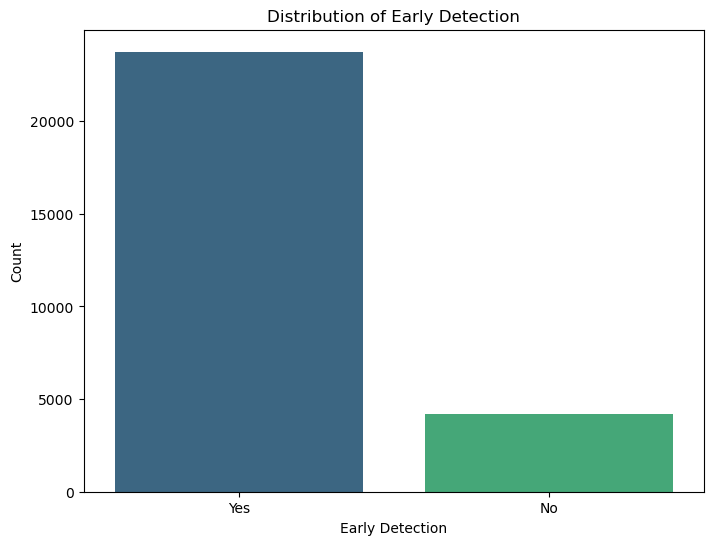

In [ ]:
early_detection_counts = dataset['Early_Detection'].value_counts()
print(early_detection_counts)

# Plotting the imbalance
plt.figure(figsize=(8, 6))
sns.barplot(x=early_detection_counts.index, y=early_detection_counts.values, palette='viridis')
plt.title('Distribution of Early Detection')
plt.xlabel('Early Detection')
plt.ylabel('Count')
plt.show()

Based on this value counts, the data is imbalanced. I will be using SMOTE to balance the data.

In [ ]:
X = dataset_encoded.drop('Early_Detection_Yes', axis=1)
y = dataset_encoded['Early_Detection_Yes']

<Axes: >

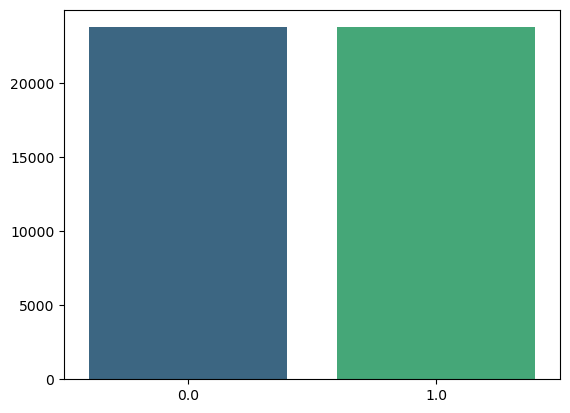

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

X_smote, y_smote = smote.fit_resample(X, y)

# Plot the distribution of the target variable after SMOTE
smote_counts = y_smote.value_counts()

sns.barplot(x=smote_counts.index, y=smote_counts.values, palette='viridis')


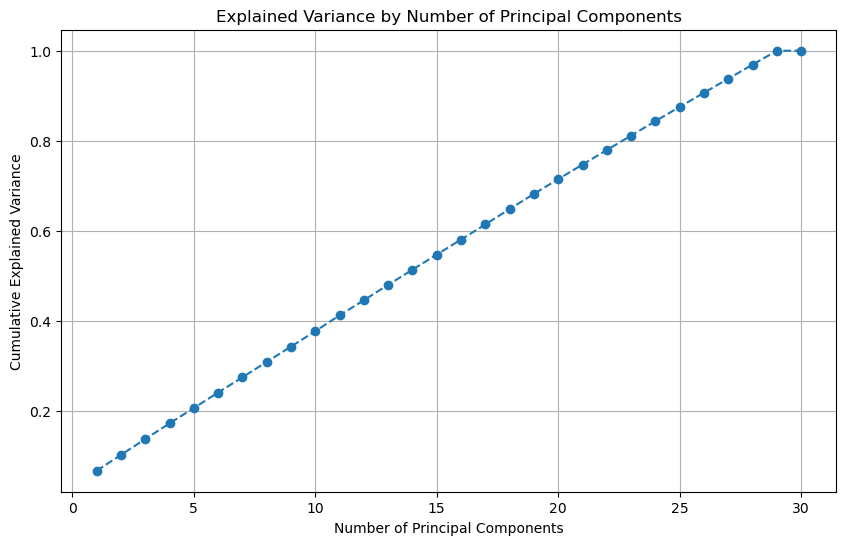

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_smote)

# Perform PCA
pca = PCA(n_components=2)  # You can choose the number of components
X_pca = pca.fit_transform(X_scaled)
# Determine the best number of components for PCA
explained_variance = []
for n in range(1, X_scaled.shape[1] + 1):
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, X_scaled.shape[1] + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

Based on this Feature, I will be using all the features to predict the Prostate Cancer.

Create a Model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_smote, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models

rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
dt_model = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=42)
lr_model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100, random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

print(rf_accuracy, dt_accuracy, lr_accuracy)

In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.56      0.59      7111
         1.0       0.60      0.67      0.64      7138

    accuracy                           0.62     14249
   macro avg       0.62      0.62      0.61     14249
weighted avg       0.62      0.62      0.61     14249



In [ ]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.60      0.60      7111
         1.0       0.60      0.59      0.60      7138

    accuracy                           0.60     14249
   macro avg       0.60      0.60      0.60     14249
weighted avg       0.60      0.60      0.60     14249



In [ ]:
print(classification_report(y_test, rf_pred))